Primeras filas de los datos normalizados
     Nombre   Apellido  Edad                    Institución   Teléfono  \
0      Rosa  Rodríguez    25  Universidad Tecnica Del Norte  929315742   
1     María      Pérez    21  Universidad Tecnica Del Norte  915467355   
2      Rosa    Ramírez    22                    Xyz Academy  973983211   
3       Ana    Ramírez    25            Universidad Central  944956311   
4  Gabriela     Flores    25  Universidad Tecnica Del Norte  985342923   

       Cédula     Estado                Correo       Fecha_Registro  
0  1111063299     El Oro      rosa96@gmail.com  22/07/2021 00:00:00  
1  1970474201     Guayas        maría92@edu.ec  03/10/2023 00:00:00  
2  1081356081     Guayas      rosa78@yahoo.com  21/02/2023 00:00:00  
3  1513332496       Loja     ana46@hotmail.com  12/05/2024 00:00:00  
4  1232882006  Pichincha  gabriela27@gmail.com  09/12/2020 00:00:00  

Total de registros: 22
Provincias únicas: 7
Instituciones únicas: 6

Personas por Provincia
E

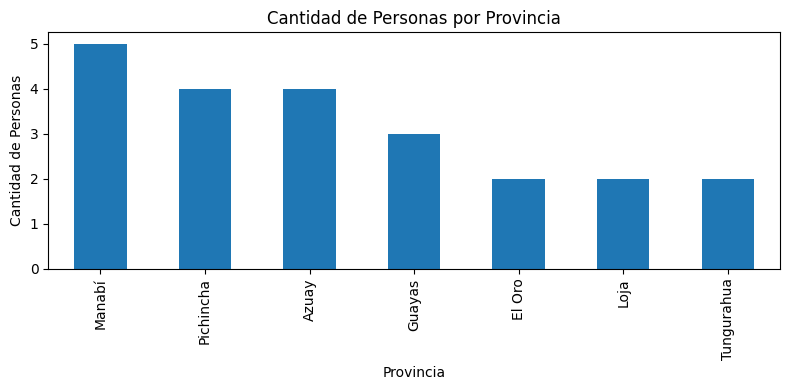


Personas por Institución
Institución
Universidad Central                6
Pontificia Universidad Catolica    5
Xyz Academy                        4
Universidad Tecnica Del Norte      3
Escuela Politecnica Nacional       3
Universidad De Cuenca              1
Name: count, dtype: int64


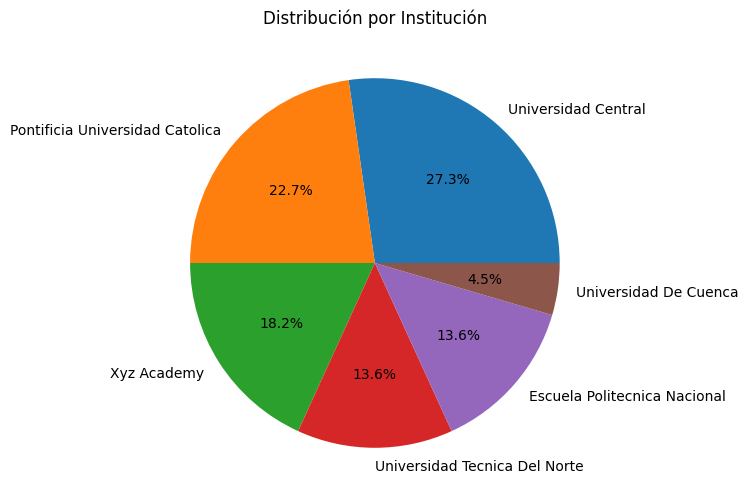


Largo promedio de teléfonos: 9.0
Largo promedio de cédulas: 9.909090909090908


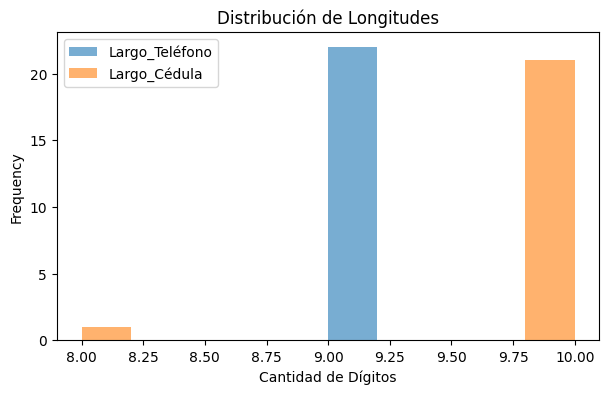


Registros por Año
Fecha_Registro
2020.0    4
2021.0    4
2022.0    4
2023.0    4
2024.0    4
2025.0    1
Name: count, dtype: int64


C:\Users\STIVEN\AppData\Local\Temp\ipykernel_13384\2955121695.py:57: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Fecha_Registro"] = pd.to_datetime(df["Fecha_Registro"], errors="coerce")


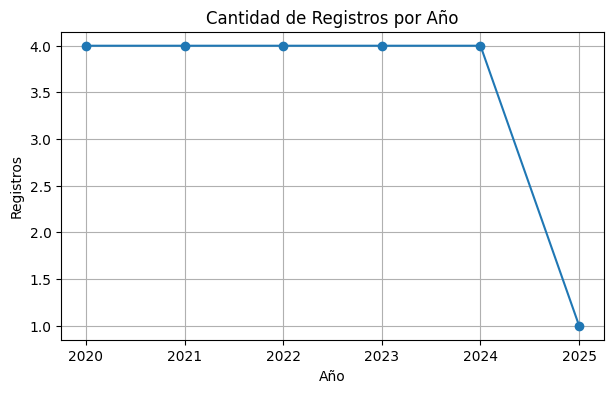


Estadísticas de Edad
Edad mínima: 19
Edad máxima: 25
Edad promedio: 22.545454545454547
Conteo de personas por edad:
Edad
19    1
20    5
21    1
22    4
23    1
24    5
25    5
Name: count, dtype: int64


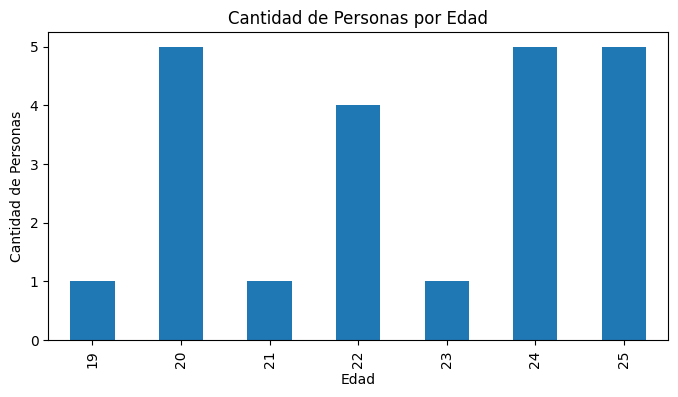


Estadísticas generadas y guardadas en 'resumen_estadisticas.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV con los datos normalizados
archivo = "ccb_personas_normalizado.csv"
df = pd.read_csv(archivo)

print("Primeras filas de los datos normalizados")
print(df.head())

# Estadísticas generales del dataset
print("\nTotal de registros:", len(df))
print("Provincias únicas:", df["Estado"].nunique())
print("Instituciones únicas:", df["Institución"].nunique())

# Conteo de personas por provincia
print("\nPersonas por Provincia")
conteo_provincia = df["Estado"].value_counts()
print(conteo_provincia)

# Gráfico de barras de personas por provincia
# Muestra cada provincia en el eje X y la cantidad de personas registradas en el eje Y
# Cada barra representa la cantidad de personas de esa provincia
conteo_provincia.plot(kind="bar", figsize=(8,4), title="Cantidad de Personas por Provincia")
plt.xlabel("Provincia")  # Etiqueta del eje X
plt.ylabel("Cantidad de Personas")  # Etiqueta del eje Y
plt.tight_layout()  # Ajusta el diseño para que no se corten etiquetas
plt.show()

# Conteo de personas por institución
print("\nPersonas por Institución")
conteo_institucion = df["Institución"].value_counts()
print(conteo_institucion)

# Gráfico circular (pie chart) de distribución por institución
# Cada porción del pastel representa la proporción de personas por institución
# autopct='%1.1f%%' muestra el porcentaje de cada institución
conteo_institucion.plot(kind="pie", autopct='%1.1f%%', figsize=(6,6), title="Distribución por Institución")
plt.ylabel("")  # Quitamos la etiqueta del eje Y para que el gráfico se vea más limpio
plt.show()

# Longitud promedio de los teléfonos y cédulas
df["Largo_Teléfono"] = df["Teléfono"].astype(str).apply(len)
df["Largo_Cédula"] = df["Cédula"].astype(str).apply(len)

print("\nLargo promedio de teléfonos:", df["Largo_Teléfono"].mean())
print("Largo promedio de cédulas:", df["Largo_Cédula"].mean())

# Histograma de longitudes de teléfonos y cédulas
# Muestra la distribución de la cantidad de dígitos en teléfonos y cédulas
# Eje X -> cantidad de dígitos, Eje Y -> cantidad de personas
df[["Largo_Teléfono", "Largo_Cédula"]].plot(kind="hist", alpha=0.6, bins=10, figsize=(7,4), title="Distribución de Longitudes")
plt.xlabel("Cantidad de Dígitos")  # Etiqueta del eje X
plt.show()

# Estadísticas por fecha de registro
df["Fecha_Registro"] = pd.to_datetime(df["Fecha_Registro"], errors="coerce")

print("\nRegistros por Año")
df["Fecha_Registro"] = pd.to_datetime(df["Fecha_Registro"], errors="coerce", dayfirst=True)
conteo_anio = df["Fecha_Registro"].dt.year.value_counts().sort_index()
print(conteo_anio)

# Gráfico de línea de registros por año
# Eje X -> años, Eje Y -> cantidad de registros en cada año
# Cada punto representa el total de personas registradas en ese año
conteo_anio.plot(kind="line", marker="o", figsize=(7,4), title="Cantidad de Registros por Año")
plt.xlabel("Año")  # Etiqueta del eje X
plt.ylabel("Registros")  # Etiqueta del eje Y
plt.grid(True)  # Mostrar líneas de cuadrícula para facilitar la lectura
plt.show()

# Estadísticas por edad
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")  # Convertir a números
print("\nEstadísticas de Edad")
print("Edad mínima:", df["Edad"].min())
print("Edad máxima:", df["Edad"].max())
print("Edad promedio:", df["Edad"].mean())
print("Conteo de personas por edad:")
print(df["Edad"].value_counts().sort_index())

# Gráfico de barras de personas por edad
# Eje X -> edades, Eje Y -> cantidad de personas con esa edad
# Cada barra representa cuántas personas tienen esa edad
df["Edad"].value_counts().sort_index().plot(kind="bar", figsize=(8,4), title="Cantidad de Personas por Edad")
plt.xlabel("Edad")  # Etiqueta del eje X
plt.ylabel("Cantidad de Personas")  # Etiqueta del eje Y
plt.show()

# Exportar resumen de estadísticas a CSV
resumen = {
    "Total_Usuarios": [len(df)],
    "Provincias_Unicas": [df["Estado"].nunique()],
    "Instituciones_Unicas": [df["Institución"].nunique()],
    "Promedio_Largo_Teléfonos": [df["Largo_Teléfono"].mean()],
    "Promedio_Largo_Cédulas": [df["Largo_Cédula"].mean()],
    "Edad_Minima": [df["Edad"].min()],
    "Edad_Maxima": [df["Edad"].max()],
    "Edad_Promedio": [df["Edad"].mean()]
}

resumen_df = pd.DataFrame(resumen)
resumen_df.to_csv("resumen_estadisticas.csv", index=False, encoding="utf-8")

print("\nEstadísticas generadas y guardadas en 'resumen_estadisticas.csv'")
